Comp-551 A3 
</br>
We divided the prediction of handwritten digits and letters into two parts. Here is the digit prediction.

In [1]:
! gdown https://drive.google.com/uc?id=1AbxjCBByF-xGV3c7FJ1ztZC1HO0O0uJ0

Downloading...
From: https://drive.google.com/uc?id=1AbxjCBByF-xGV3c7FJ1ztZC1HO0O0uJ0
To: /content/kaggle.json
100% 66.0/66.0 [00:00<00:00, 60.5kB/s]


In [2]:
! pip install kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
! kaggle competitions download -c comp-551-fall-2021
! unzip images_l.pkl.zip
! unzip images_test.pkl.zip
! unzip images_ul.pkl.zip
! unzip labels_l.pkl.zip

 91% 178M/197M [00:01<00:00, 109MB/s] 
100% 197M/197M [00:01<00:00, 117MB/s]
 95% 189M/198M [00:01<00:00, 105MB/s]
100% 198M/198M [00:01<00:00, 109MB/s]
  0% 0.00/141k [00:00<?, ?B/s]
100% 141k/141k [00:00<00:00, 128MB/s]
 94% 93.0M/99.0M [00:00<00:00, 92.1MB/s]
100% 99.0M/99.0M [00:00<00:00, 119MB/s] 
Archive:  images_l.pkl.zip
  inflating: images_l.pkl            
Archive:  images_test.pkl.zip
  inflating: images_test.pkl         
Archive:  images_ul.pkl.zip
  inflating: images_ul.pkl           
Archive:  labels_l.pkl.zip
  inflating: labels_l.pkl            


In [3]:
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU, ZeroPadding2D,Convolution2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import History
from tensorflow.keras.optimizers import Nadam, Adam, SGD
from keras.applications.vgg16 import VGG16
from keras.applications.densenet import DenseNet169
from keras.applications.resnet import ResNet152, ResNet101, ResNet50
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from google.colab import drive
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras import layers, regularizers, Input
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau
from keras import optimizers

In [4]:
# Image data for training (30,000 sample, each sample is a 56x56 image)
# train_labels = pd.read_csv('train_max_y.csv')
# train_images = pd.read_pickle('train_max_x')
# test_images = pd.read_pickle('test_max_x')
with open("images_l.pkl", 'rb') as f:
    # load into as a numpy array
    train_labelled_data = pickle.load(f)
# Test images. The prediction corresponding to these images should be uploaded. (15,000 samples)
with open("images_test.pkl", 'rb') as f:
    test_data = pickle.load(f)
# Labels for training (30,000 rows, each row is a size 36 binary vector, which is the label to the corresponding image)
with open("labels_l.pkl", 'rb') as f:
    train_labelled_y = pickle.load(f)
# Additional images that can be used for training the classifier.
# Labels for these images are not provided. (30,000 samples, where each sample is a 56x56 image)
with open("images_ul.pkl", 'rb') as f:
    train_unlabelled_x = pickle.load(f)

# processing 

In [5]:
# load already process train, test, unlabel with prediction data
! gdown https://drive.google.com/uc?id=1wyUpGYONbWRjdaLgeiEH2ryqm_kMOMF_
! gdown https://drive.google.com/uc?id=1tFt0ddczfNPmq8IUNnZ8ifGUbgzP9DxU
! gdown https://drive.google.com/uc?id=1bOq70mP5ghxfiFtbK3rTbPDcefkxgyQx
! gdown https://drive.google.com/uc?id=1oSJM0BtYu_hiJ7mkSNphJLAmBVnznO4o

Downloading...
From: https://drive.google.com/uc?id=1wyUpGYONbWRjdaLgeiEH2ryqm_kMOMF_
To: /content/processed_train_set.csv
100% 386M/386M [00:01<00:00, 223MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tFt0ddczfNPmq8IUNnZ8ifGUbgzP9DxU
To: /content/processed_test_set.csv
100% 193M/193M [00:00<00:00, 221MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bOq70mP5ghxfiFtbK3rTbPDcefkxgyQx
To: /content/processed_ul_train_set.csv
100% 386M/386M [00:01<00:00, 220MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oSJM0BtYu_hiJ7mkSNphJLAmBVnznO4o
To: /content/ul_train_label.csv
100% 216k/216k [00:00<00:00, 34.1MB/s]


# Digit

We build the model1 based on VGG to predict the digits.

In [6]:
def cnn():
    # create model
    model = Sequential()
    vgg16 =  VGG16(weights='imagenet', include_top=False, input_shape=(56,56,3))
    model.add(vgg16)
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.0001),metrics=['accuracy'])
    # model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.RMSprop(lr=0.0001),metrics=['accuracy'])
    # Compile
    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = cnn()
model.summary() 

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                51

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


We use the clear_noise train dataset since our model1 is noise sensitive.

In [7]:
train_labelled_x=np.array(pd.DataFrame(pd.read_csv('processed_train_set.csv')))
train_labelled_x=train_labelled_x.reshape((30000,56,56))

We further process our training data, for example, do normalization. Also, we divide the training data into train set and validation set. 

In [8]:
x_train = train_labelled_x
y_train = train_labelled_y
for i in range(x_train.shape[0]):
  x_train[i] = (x_train[i]>200).astype('int32')*255
import torch

x_train = torch.Tensor(x_train)
x_train = torch.unsqueeze(x_train, dim=3)/255.
x_train = x_train.repeat(1,1,1,3)
x_train = x_train.numpy()
x_train = x_train.astype('float32')
x_valid = x_train[29500:-1, :]
x_train = x_train[:29500, :]
print('x_train shape:', x_train.shape)
print('x_valid shape:', x_valid.shape)

# y_train = keras.utils.to_categorical(y_train, 10)
a = y_train
y_valid = y_train[29500:-1, :10]
y_train = y_train[:29500, :10]
print('y_train shape:', y_train.shape)
print('y_valid shape:', y_valid.shape)

x_train shape: (29500, 56, 56, 3)
x_valid shape: (499, 56, 56, 3)
y_train shape: (29500, 10)
y_valid shape: (499, 10)


Train our model.

In [10]:
for i in range(25):
  print('Trail: ',i)
  history = model.fit(x_train, y_train, batch_size=100, epochs=1, verbose=1)
  score = model.evaluate(x_valid, y_valid, verbose=1)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  model.save('VGG16_2_SP_{}'.format(i))

Trail:  0
16/16 [==============================] - 1s 23ms/step - loss: 0.5695 - accuracy: 0.8898
Test loss: 0.5695082545280457
Test accuracy: 0.8897795677185059
INFO:tensorflow:Assets written to: VGG16_2_SP_0/assets
Trail:  1
16/16 [==============================] - 0s 10ms/step - loss: 0.3112 - accuracy: 0.8838
Test loss: 0.31119489669799805
Test accuracy: 0.8837675452232361
INFO:tensorflow:Assets written to: VGG16_2_SP_1/assets
Trail:  2
16/16 [==============================] - 0s 10ms/step - loss: 0.4339 - accuracy: 0.8898
Test loss: 0.43386438488960266
Test accuracy: 0.8897795677185059
INFO:tensorflow:Assets written to: VGG16_2_SP_2/assets
Trail:  3
16/16 [==============================] - 0s 10ms/step - loss: 0.2393 - accuracy: 0.9178
Test loss: 0.23925137519836426
Test accuracy: 0.9178356528282166
INFO:tensorflow:Assets written to: VGG16_2_SP_3/assets
Trail:  4
16/16 [==============================] - 0s 10ms/step - loss: 0.2425 - accuracy: 0.9299
Test loss: 0.24254962801933289


save most powerful model indicated by validation set

In [13]:
model_1 = keras.models.load_model('VGG16_2_SP_23')

In [ ]:
pickle.dump(model_1, open('model_2.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://ad3da111-451a-4a63-b9a9-a89d1d8ac953/assets


Load and process test data like training data.

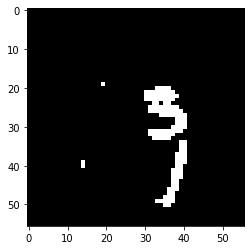

In [14]:
# load testing data for model testing
x_test=np.array(pd.DataFrame(pd.read_csv('processed_test_set.csv')))

x_test=x_test.reshape((15000,56,56))

import matplotlib.pyplot as plt
import random

plt.imshow(x_test[random.randint(0,14999)], cmap="gray")
plt.show()

# with open("images_test.pkl",'rb') as f:
#   x_test = pickle.load(f)
for i in range(x_test.shape[0]):
  x_test[i] = (x_test[i]>200).astype('int32')*255
x_test = torch.Tensor(x_test)
x_test = torch.unsqueeze(x_test,dim=3)/255
x_test = x_test.repeat(1,1,1,3)
x_test = x_test.numpy()
x_test = x_test.astype('float32')

In [15]:
result = model.predict(x_test,verbose=1)
result = np.argmax(result, axis = 1)
print(result[0:10])

469/469 [==============================] - 4s 8ms/step
[0 4 9 0 6 9 3 2 1 6]
